In [1]:
  %matplotlib inline
  import matplotlib.pyplot as plt
  import tensorflow as tf
  import numpy as np
  from sklearn.metrics import confusion_matrix
  !pip install python-mnist

In [2]:
tf.__version__

'1.12.0'

####Load Data


In [6]:

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [7]:


print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))


Size of:
- Training-set:		55000


In [8]:
data.test.labels[0:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [0]:
# set class containing index of 1 in labels
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [10]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [0]:
img_size = 28

# The images are stored in one-dimensional arrays of this length.
img_size_flat = img_size*img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

###Helper-function for plotting images
Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [0]:
def plot_images(images, cls_true, cls_pred=None):
  #assertion --> program continue if true else fnc will break
  assert len(images) == len(cls_true) == 9
  
  #Create figure with 3x3 sub-plots.
  fig, axes = plt.subplots(3, 3)
  fig.subplots_adjust(hspace=0.3, wspace = 0.3)
  
  for i, ax in enumerate(axes.flat):
    #plot image
    ax.imshow(images[i].reshape(img_shape), cmap = "binary")
    
    #show true and predicted classes
    if cls_pred is None:
      xlabel = "True:{0}".format(cls_true[i])
    else:
      xlabel = "True:{0}, Pred:{1}".format(cls_true[i], cls_pred[i])
     
    ax.set_xlabel(xlabel)
    
    #Remove Ticks from the plots
    ax.set_xticks([])
    ax.set_yticks([])
    
  # Ensure the plot is shown correctly with multiple plots
  # in a single Notebook cell.
  plt.show()

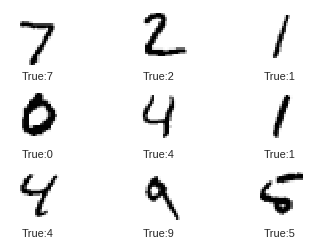

In [13]:
#plot some images of starting
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images = images, cls_true = cls_true)

In [0]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])

### Variables to be optimized



In [0]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [0]:
biases = tf.Variable(tf.zeros([num_classes]))

In [0]:
logits = tf.matmul(x, weights) + biases

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

###Cost-function to be optimized

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels=y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)

###Optimization method

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.9).minimize(cost)

###Performance Measures

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
#tf.initialize_all_variables().run()

##Tensor  Flow Run


###Create session

In [0]:
session = tf.Session()

###Initialise variable

In [0]:
session.run(tf.global_variables_initializer())

###Helper-function to perform optimization iterations

In [0]:
batch_size = 10

In [0]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size=batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

###Helper-functions to show performance

In [0]:
feed_dict_test = {x:data.test.images,
                 y_true: data.test.labels,
                 y_true_cls:data.test.cls}

In [0]:
def print_accuracy():
   # Use TensorFlow to compute the accuracy.
   acc = session.run(accuracy, feed_dict=feed_dict_test)
   print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
#Function for printing and plotting the confusion matrix using scikit-learn

def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true = cls_true,
                         y_pred = cls_pred)
    # Print the confusion matrix as text.
    print(cm)
    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


In [0]:
#Function for plotting examples of images from the test-set that have been mis-classified.

def plot_example_errors():
  
  # Use TensorFlow to get a list of boolean values
  # whether each test-image has been correctly classified,
  # and a list for the predicted class of each image.
  
  correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                  feed_dict=feed_dict_test)

  # Negate the boolean array.
  incorrect = (correct == False)

  # Get the images from the test-set that have been
  # incorrectly classified.
  images = data.test.images[incorrect]

  # Get the predicted classes for those images.
  cls_pred = cls_pred[incorrect]

  # Get the true classes for those images.
  cls_true = data.test.cls[incorrect]

  # Plot the first 9 images.
  plot_images(images=images[0:9],
              cls_true=cls_true[0:9],
              cls_pred=cls_pred[0:9])

###Helper-function to plot the model weights

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

###Performance before any optimization

In [93]:
print_accuracy()

Accuracy on test-set: 9.8%


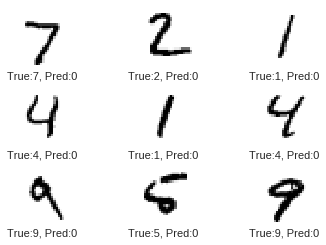

In [94]:
plot_example_errors()

###Performance after 1 optimization iteration

In [0]:
optimize(num_iterations=1)

In [96]:
print_accuracy()

Accuracy on test-set: 20.3%


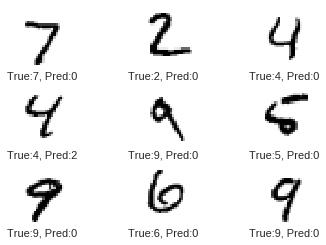

In [97]:
plot_example_errors()

In [0]:
optimize(num_iterations=700)

In [99]:
print_accuracy()

Accuracy on test-set: 85.5%


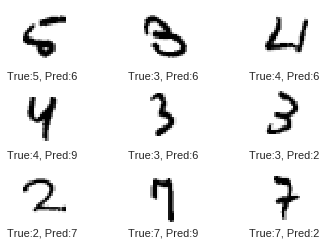

In [100]:
plot_example_errors()

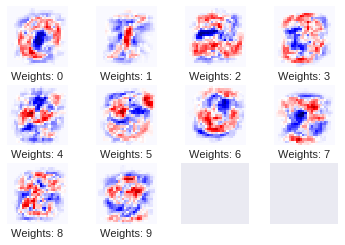

In [101]:
plot_weights()

[[ 943    0    1    0    0    2   23    1   10    0]
 [   0 1084    6    0    0    4    5    1   35    0]
 [   6    0  903    4    3    1   27   11   62   15]
 [   9    0   73  711    2   67   17   13   65   53]
 [   1    1    8    0  636    1   60    2   32  241]
 [  15    2   14   31    7  684   33    9   81   16]
 [   7    2    2    0    4    4  928    0    7    4]
 [   3   10   28    0    2    2    5  871    3  104]
 [   9    8    9    4    8   20   21    9  840   46]
 [   7    4    1    4    6   10    3   11   13  950]]


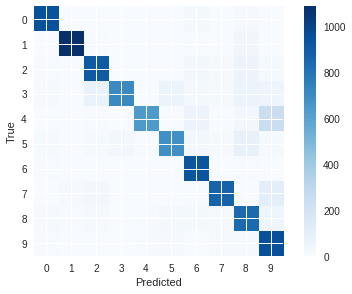

In [102]:
print_confusion_matrix()